# Simple Regression Practice

In [1]:
import numpy as np                          
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# import data
# data_set = pd.read_csv("DNN_dataset.csv")
# data_set = np.array(data_set)
# print("[TravelTimes],[StudyingTimes],[Scores(Max=100)]")
# print(data_set)

# Initial inputs/outputs

In [3]:
num_data = 17

# 24 - 8(sleeping hours) = 16 hours can be used
# data_set : [Travelhours , Studyinghours , Scores]
data_set = np.array(([0,16,95],[1,15,90],[2,14,85],[3,13,80],[4,12,75],[5,11,70],[6,10,65],[7,9,60],[8,8,55],[9,7,50],
                    [10,6,45],[11,5,40],[12,4,35],[13,3,30],[14,2,25],[15,1,20],[16,0,15]))

# x = np.random.randint(1, 10, size = (num_data, 2))
x = np.zeros((num_data,2))
x = data_set[:,0:2]

bias = np.random.randn(num_data, 1)
# bias = bias/np.amax(bias, axis = 0)

# merge_x[:,0] = TravelHours , merge_x[:,1] = StudyingHours
merge_x = np.hstack((x, bias))                       # merge x and bias [3*num_data]

# y = np.random.randint(0,100, size = (num_data, 1))
y = np.zeros((num_data,1))
y = data_set[:,2]
y = y.reshape((num_data,1))

print("[TravelHours , StudyingHours , bias]")
print('# Original_x:\n', merge_x)
print('---------------------------------------------------------------------')
print("[Scores(Max=100)]")
print('# Original_y:\n', y)
print('---------------------------------------------------------------------')

[TravelHours , StudyingHours , bias]
# Original_x:
 [[ 0.         16.         -0.38918416]
 [ 1.         15.         -0.10806209]
 [ 2.         14.         -0.1200487 ]
 [ 3.         13.         -0.05051891]
 [ 4.         12.         -1.07894299]
 [ 5.         11.         -0.20249964]
 [ 6.         10.          1.08208789]
 [ 7.          9.          0.07822894]
 [ 8.          8.          0.2229348 ]
 [ 9.          7.         -0.15833669]
 [10.          6.         -0.76028554]
 [11.          5.          1.09920743]
 [12.          4.          1.08818547]
 [13.          3.          0.99526065]
 [14.          2.          0.07423199]
 [15.          1.          0.35972951]
 [16.          0.         -1.60501811]]
---------------------------------------------------------------------
[Scores(Max=100)]
# Original_y:
 [[95]
 [90]
 [85]
 [80]
 [75]
 [70]
 [65]
 [60]
 [55]
 [50]
 [45]
 [40]
 [35]
 [30]
 [25]
 [20]
 [15]]
---------------------------------------------------------------------


# Pre-Processing

In [4]:
# Pre-processing
# for n in range(num_data):                  # if sleeping > studying, grade range in 50-70 scores
    # if (x[n,0] > x[n,1]):
        # y[n,0] = np.random.randint(50,70)
    # else:                                   # if sleeping < studying, grade range in 80-100 scores
        # y[n,0] = np.random.randint(80,100)


# Normalization :
# scaling units (range in 0 < x,y < 1)
x = merge_x/np.amax(merge_x, axis = 0)
x_train = x[0:10 , :]                        # 60 % training
y = y/100
y_train = y[0:10 , :]
print('# Scaling_training x:\n', x_train)
print('---------------------------------------------------------------------')
print('# Scaling_training y:\n', y_train)
print('---------------------------------------------------------------------')

x_valid = x[10:num_data , :]                 # 40 % training
y_valid = y[10:num_data , :]
print('# Scaling_valid x:\n', x_valid)
print('---------------------------------------------------------------------')
print('# Scaling_valid y:\n', y_valid)
print('---------------------------------------------------------------------')

# x_test = np.random.randint(1, 10, size = (num_data, 2))
# bias_tset = np.random.randn(num_data,1)
# merge_x_test = np.hstack((x,bias_tset))   
# x_test = merge_x_test/np.amax(merge_x_test, axis = 0)
# x_test = x_test[0:900,:]
# print('# scaling test x:\n', x_test)


# Scaling_training x:
 [[ 0.          1.         -0.35405889]
 [ 0.0625      0.9375     -0.0983091 ]
 [ 0.125       0.875      -0.10921387]
 [ 0.1875      0.8125     -0.0459594 ]
 [ 0.25        0.75       -0.9815645 ]
 [ 0.3125      0.6875     -0.18422331]
 [ 0.375       0.625       0.98442556]
 [ 0.4375      0.5625      0.0711685 ]
 [ 0.5         0.5         0.20281413]
 [ 0.5625      0.4375     -0.14404624]]
---------------------------------------------------------------------
# Scaling_training y:
 [[0.95]
 [0.9 ]
 [0.85]
 [0.8 ]
 [0.75]
 [0.7 ]
 [0.65]
 [0.6 ]
 [0.55]
 [0.5 ]]
---------------------------------------------------------------------
# Scaling_valid x:
 [[ 0.625       0.375      -0.69166703]
 [ 0.6875      0.3125      1.        ]
 [ 0.75        0.25        0.98997281]
 [ 0.8125      0.1875      0.90543479]
 [ 0.875       0.125       0.06753229]
 [ 0.9375      0.0625      0.32726263]
 [ 1.          0.         -1.46015944]]
------------------------------------------------

# Define a Neural Network

In [5]:
class NeuralNetwork(object):
    def __init__(self):     # initial property
        
        self.alpha = 0.01    # learning rate
        
        # dimesion
        self.inputSize = 3
        self.hiddenSize = num_data     
        self.outputSize = 1
        
        # weights (Gaussion Random)
        self.w1 = np.random.randn(self.inputSize, self.hiddenSize)   # from input to hidden layer [3x4]
        self.w2 = np.random.randn(self.hiddenSize, self.outputSize)  # from hidden to output layer [4x1]
        
    def feed_forware(self, x_train):
        self.z = np.dot(x_train, self.w1)              # forware pass matrix dot
        self.sz = self.sigmoid(self.z)          # activation function between input and hidden
        self.v_sz = np.vstack((self.sz, bias.T))
        self.z2 = np.dot(self.v_sz, self.w2)       
        output = self.sigmoid(self.z2)            # activation function between hidden and output
        output = np.delete(output, -1, axis=0)
        return output
        
    def sigmoid(self, s):    # define sigmoid function
        return 1/(1 + np.exp(-s))
    
    def backware_pass(self, x_train, y_train, output):
        self.output_error = (y_train - output)          # error in output
        self.output_delta = self.output_error * self.deriv_sigmoid(output)
        self.sz_error = np.dot(self.output_delta, self.w2.T)      # from output back to hidden layer [1x3]
        self.sz_delta = self.sz_error * self.deriv_sigmoid(self.sz)
        
        # weight update
        self.w1 += self.alpha * np.dot(x_train.T, self.sz_delta)    # adjusting first weight set {input to hidden}
        self.w2 += self.alpha * np.dot(self.sz.T, self.output_delta)   # adjusting second weight set {hidden to output}
        self.last_w1 = self.w1     # storage the last weight
        self.last_w2 = self.w2     
    
    def deriv_sigmoid(self, ds):   # define sigmoid function derivative
        return ds * (1-ds)
    
    def train(self, x_train, y_train):
        fp_output = self.feed_forware(x_train)
        self.backware_pass(x_train, y_train, fp_output)

# Training Neural Network and Plot

# Every_epoch_Loss: 
Loss(%): 0.05157033572098452
Loss(%): 0.01346290449743052
Loss(%): 0.00773041167802382
Loss(%): 0.004435795325724953
Loss(%): 0.0026294602933092607
Loss(%): 0.0016622909292852938
Loss(%): 0.001148528679130473
Loss(%): 0.0008753335618638631
Loss(%): 0.0007292140782650909
Loss(%): 0.0006503603936035827
# Input_x_train:
 [[ 0.          1.         -0.35405889]
 [ 0.0625      0.9375     -0.0983091 ]
 [ 0.125       0.875      -0.10921387]
 [ 0.1875      0.8125     -0.0459594 ]
 [ 0.25        0.75       -0.9815645 ]
 [ 0.3125      0.6875     -0.18422331]
 [ 0.375       0.625       0.98442556]
 [ 0.4375      0.5625      0.0711685 ]
 [ 0.5         0.5         0.20281413]
 [ 0.5625      0.4375     -0.14404624]]
# Idea_y_train:
[[0.95]
 [0.9 ]
 [0.85]
 [0.8 ]
 [0.75]
 [0.7 ]
 [0.65]
 [0.6 ]
 [0.55]
 [0.5 ]]
----------------------------------------
# Loss array:
 [0.05157034 0.0134629  0.00773041 0.0044358  0.00262946 0.00166229
 0.00114853 0.00087533 0.00072921 0.00065036]


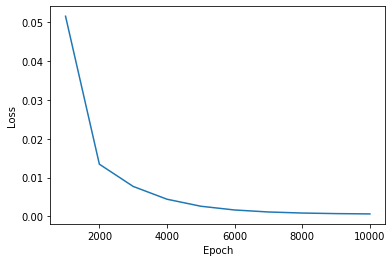

In [6]:
NN = NeuralNetwork()    # build a neural network objection
epoch = 10000            # epoch 1000 times to train
loss_array = np.zeros((1,10))
epoch_plot = np.array([1000,2000,3000,4000,5000,6000,7000,8000,9000,10000])

print("# Every_epoch_Loss: ")
k = 0
for i in range(epoch):  
    if (i % 1000 == 0):     # every epoch 100 times print each "Loss"
        print("Loss(%): " + str(np.mean(np.square(y_train - NN.feed_forware(x_train)))))   # Mean square error，MSE 
        loss_array[0,k] = np.mean(np.square(y_train - NN.feed_forware(x_train)))    
        k = k + 1
    NN.train(x_train, y_train)

print("# Input_x_train:\n " + str(x_train))
print("# Idea_y_train:\n" + str(y_train))
print("----------------------------------------")
print("# Loss array:\n " + str(loss_array[0,:]))

# plot
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(epoch_plot, loss_array[0,:])
plt.show()

# Valid the Model

In [7]:
print('# Last_tran_w1:\n', NN.last_w1)
print('# Last_tran_w2:\n', NN.last_w2)
valid_A1 = np.dot(x_valid, NN.last_w1)
valid_G1 = NN.sigmoid(valid_A1)
valid_A2 = np.dot(valid_G1, NN.last_w2)
valid_G2 = NN.sigmoid(valid_A2)
print("-------------------------------------------")
print("# valid_Loss: " + str(np.mean(np.square( y_valid - NN.feed_forware(x_valid)))))
print("-------------------------------------------")
deviation = np.abs(y_valid-valid_G2/y_valid)*100
print('# Valid Deviation (%):\n', deviation)   # deviation [num_data x3]


each_valid_set = np.array([0, 1, 2, 3, 4, 5, 6])


# Last_tran_w1:
 [[-1.12344139  0.43952904 -0.63484049  1.65429213  1.07371414 -0.04824745
  -0.96189989 -0.79918909 -1.34072449  1.36921762  0.86913466 -0.2234287
  -1.39056699 -0.74918943 -0.08836212 -1.33484828  1.24638504]
 [-1.65870647 -1.40014652 -0.06221821 -0.4310726  -1.14461581 -0.38747869
   0.46999474  0.39171219  0.98086385 -1.61732179  0.78244124 -0.75403516
  -1.0898958  -0.50383332  0.05581466  1.12615258 -0.96242696]
 [ 0.07750679  1.24933616  0.37453878  1.49263975  0.44997674 -1.07896509
  -0.9280632   1.27915616  1.02784504  0.64983508  0.02771734  0.68558943
  -1.05806722  1.29356896  1.98540768  0.40430817 -0.41357551]]
# Last_tran_w2:
 [[ 0.83664895]
 [-1.71558974]
 [-0.14891622]
 [-1.46243986]
 [-0.96682134]
 [-0.83114849]
 [-0.14589838]
 [ 1.07498794]
 [ 1.65174067]
 [-0.90800265]
 [ 0.71716546]
 [ 1.3519435 ]
 [ 1.03719514]
 [-0.37500461]
 [ 0.33822766]
 [ 0.87125386]
 [ 0.20431025]]
-------------------------------------------
# valid_Loss: 0.00350660461745435

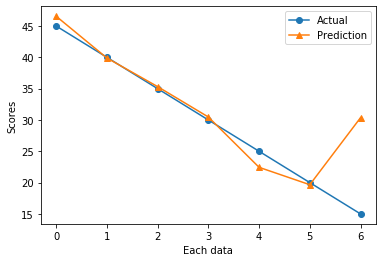

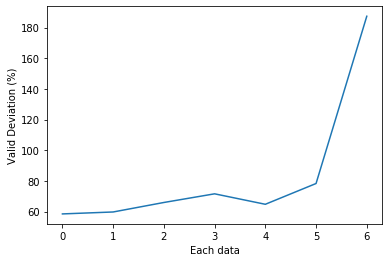

In [8]:
# plot
plt.xlabel('Each data')
plt.ylabel('Scores')
plt.plot(each_valid_set, 100*y_valid,'-o', label = "Actual")
plt.plot(each_valid_set, 100*valid_G2, '-^',label = "Prediction")
plt.legend()
plt.show()

plt.xlabel('Each data')
plt.ylabel('Valid Deviation (%)')
plt.plot(each_valid_set, deviation)
plt.show()
